# Programming Best Practices and the Central Limit Theorem

This tutorial is intended to provide practice in debugging, speed optimization, and spotting bad habits in programming. The template code provided below runs, but is deeply flawed. Your goal is to improve the code following programming best practices, and along the way you'll learn something about the Central Limit Theorem.

Author: Sheila Kannappan
Last Modified: September 2019

## Setup

If you're looking at this notebook, you've presumably already followed these instructions. Please take a moment to complete any that you have not yet finished.

 * go to https://jupyter.org/try
 * click "Try JupyterLab"
 * close open tabs in the Lab (not necessary, just less confusing)
 * open a terminal in the Lab (File>New>Terminal)
 * paste the following into the terminal to get the jupyter notebook:<br/>
  `wget https://raw.githubusercontent.com/capprogram/bestpractices/master/bestpractices.ipynb -P /home/jovyan/demo`
 * paste both of the following into the terminal to get the two python codes:<br/>
  `wget https://raw.githubusercontent.com/capprogram/bestpractices/master/templatecode.py -P /home/jovyan/demo` <br>
  `wget https://raw.githubusercontent.com/capprogram/bestpractices/master/templatecodeprotected.py -P /home/jovyan/demo`
 * if necessary, click the refresh page (curled arrow) at the top of the webpage
 * launch the jupyter notebook and open the two python codes by double clicking on them
 * you can run or re-run individual cells in the notebook by clicking on them and typing Ctrl-Enter

In [2]:
# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats     # statistical functions
#import pdb                      # python debugger
#import time                     # python timekeeper

# ipython "magic" to enable static plot output directly to notebook
%matplotlib inline

## A Little Background on Programming Best Practices

### Goals

* Easy debugging
* Easy modification
* Understandability (now, after passage of time, and to another person)
* Speed

### Strategies
* Plan – consider likely rate-limiting steps and best methodology before starting
* Modularize – test subcomponents and use branches in Git
* Check variable values, types, array sizes by hand (print statements or interrupted run)
* Don’t assume “running” = “working”; brainstorm sanity checks
* Use meaningful variable names (more than one letter!) that are not too similar
* Keep standard defaults: e.g. i, j reserved for integer loop counters
* Replace hardwired numbers with constant names at top of code or even in separate file
* Write comments (including to bookend command sets, e.g. in if-then)
* Take advantage of helpful visual appearance: white space, syntax highlighting
* Avoid loops when unnecessary (possible tradeoff with understandability)
* Manage I/O and memory; eliminate large arrays when no longer needed
* Use print and system time statements to find out where code fails/slows

### Python-specific tips
* don't define a function in the middle of a program, even though python lets you -- doing so muddles whether variables are defined locally or globally
* don't use lists when you can use numpy arrays, and especially don't append elements to dynamically build lists, unless you want glacially slow code
* pay attention to white space, it has syntactical meaning! and as a corollary, don't use tabs as white space
* standard indentation of code levels is 4 spaces (this is a matter of preference, but standardizing is essential when collaborating)
* protected code: it's generally a bad idea to import a script -- it will run at the time of import! you can use the "def main" protocol to create a "protected" code if you want your code to be both callable like a script and importable like a package

### Slight Digression: How to Write Protected Code
To understand how to write protected code, compare `templatecode.py` and `templatecodeprotected.py` in side-by-side Jupyter Lab windows (outside this notebook). For more information on writing importable modules and packages, consult [this link](https://en.wikibooks.org/wiki/Python_Programming/Modules).

## A Little Background on the Central Limit Theorem

Just for fun, the code for this tutorial will explore the Central Limit Theorem by comparing Poisson distributions with Gaussian distributions. A "distribution" is a function giving the probabilities (plotted on the y axis) associated with different outcomes (values of x), so the whole function integrates to the sum of all possible probabilities: 1.

An example of a Poisson process is counting the # of people who use the gym per hour where the count is run for a period of time nhr (set to = different times). We assume the underlying average users per hour U is fixed but the counts have "Poisson fluctuations" so N = nhr x U specifies the *expected* count (the mean of the theoretical Poisson distribution) not the observed count Nobs, whose possible values have different probabilities following a Poisson distribution with mean N. (In fact nhr may need to be very large for N to exactly equal Nobs, because Nobs is by definition an integer, but U is by definition a real number.)

Statistical theory tells us that for a Poisson process, the observed count Nobs fluctuates around the true theoretical mean N with a 68% confidence interval of +-sqrt(N) for "large N". The sleight of hand of statistics is to use the observed data to estimate N as Nobs and likewise estimate the 68% confidence interval as +-sqrt(Nobs). Thus the estimated fractional error in the count is fracerr = sqrt(Nobs)/Nobs = 1/sqrt(Nobs). The 1/sqrt explains why we get a  better estimate of U by running the count for 10 hours rather than 1 hour. However in the code we will not use data but simply compare the theoretical distributions while increasing N (or equivalently, increasing nhr).

According to the Central Limit Theorem, as we increase N, the Poisson distribution should start to look like a Gaussian. Therefore we will plot the Poisson distribution for increasing N and overplot Gaussians with the same mean N and 68% confidence interval +-sqrt(N), to see how quickly the Poisson shape approaches a Gaussian shape (i.e., to determine when we reach the "large N" limit).

## Task 1: Debugging

A bug is crashing the template code. Try to find it using the python debugger module "pdb" as described in the tutorial here: https://pythonconquerstheuniverse.wordpress.com/category/python-debugger/ The template code is so short that pdb is not really necessary to debug it, but try to use pdb anyway just to get the experience for future reference. Check the size and contents of the variables at each step to determine whether they make sense. Useful commands include print, len(), np.size() and .shape(). Look at the output to see if it makes sense. Just because a code stops crashing doesn't mean it is doing what you want.
<br>
WATCH OUT: Depending on your specific python environment, the very first bug you may need to find is one that can cause pdb itself to malfunction -- inspect the code to see how it creates ambiguity in the meaning of "n" for pdb.

In [ ]:
# edit the protected version of the template code outside this notebook and re-run this cell until the bugs are gone
%run templatecodeprotected

## Task 2: Speed-Up

We don't always want to optimize code speed -- sometimes it's just not important -- but you should be in the habit of avoiding silly things that slow your code down, like unnecessary loops or math operations. Measure the time taken by the whole template code as well as smaller parts of the template code and try to find inefficiencies. When you find a slow step, ask yourself whether it could be faster, and whether it matters (is it the rate-limiting step?). For now, fix it even if it's not the rate-limiting step, just for practice. Overall, you should be able to speed up this code by about a factor of 10. Here are some tools for timing code:

* If you're working in ipython (as in this notebook), you can use the [`%time`](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-time) and [`%timeit`](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) magics. __You should use the protected version of the code if you want to run %timeit on the ipython command line.__ For example:

In [ ]:
# first make a reference copy of the protected version of the code (e.g., "templatecodeslow.py")
# then edit the template code outside this notebook and re-run this cell until the code is noticeably faster
import templatecode_rev
%timeit templatecode_rev.main()

198 ms ± 6.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


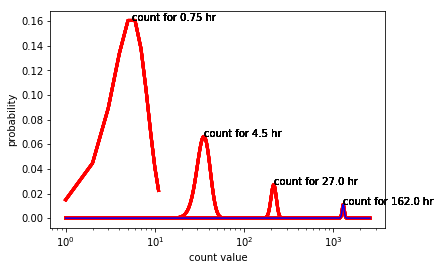

In [4]:
import templatecodeslow
%timeit templatecodeslow.main()

* You can also try using the system clock. The times you derive with the system clock will be affected by delays from unrelated processes running in the background, but the clock is still handy for obtaining multiple timestamps to identify the bottlenecks in your code. For example:

    ~~~
    import numpy as np
    import time

    init_time = time.clock()  # start clock
    x = np.linspace(0,100,1000000)
    y = np.sqrt(x)

    elap_time = time.clock() - init_time  # finds difference

    print "Time elapsed is %0.3f ms" % (elap_time*1000)  # converts to ms
    ~~~

In [ ]:
# edit the template code outside this notebook and re-run this cell until the code is faster
%run templatecodeprotected

### Slight Digression: timeit outside ipython
By the way, even when you're not working in ipython, you can time code using [`timeit.py`](https://docs.python.org/2/library/timeit.html). For example the following times the function "test": 

    ~~~
    def test():
        """Stupid test function"""
        L = []
        for i in range(100):
        L.append(i)

    if __name__ == '__main__':
        import timeit
        print(timeit.timeit("test()", setup="from __main__ import test"))
    ~~~

## Task 3: Clean-Up
Some things in the template code represent poor programming practice, even though they do not affect speed and are not bugs. Note examples and correct them.

In [ ]:
# clean up the template code outside this notebook and re-run this cell to make sure it still works
%run templatecodeprotected

## Task 4: Checking Results
Once you've got the code fixed up, you can play with the zoom in the plot window to see how closely the Poisson and Gaussian distributions match each other for each value of N. If they match well, does that mean the fractional error in the observed count must be small? Explain.

In [ ]:
# you can now use the %matplotlib notebook and %load magics to have the code and interactive plot right here
%matplotlib notebook

In [ ]:
%load templatecodeprotected